In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from merlion.utils import TimeSeries
from merlion.models.forecast.arima import Arima, ArimaConfig
from merlion.models.forecast.smoother import MSES, MSESConfig
from merlion.models.forecast.lstm import LSTM, LSTMConfig
from merlion.transform.base import Identity
from merlion.transform.resample import TemporalResample
from merlion.evaluate.forecast import ForecastMetric
from statsmodels.tsa.arima_model import ARIMA
from merlion.evaluate.forecast import ForecastMetric
from merlion.models.ensemble.combine import Mean, ModelSelector
from merlion.models.ensemble.forecast import ForecasterEnsemble, ForecasterEnsembleConfig

In [130]:
# 
df = pd.read_csv('Predict_Data_6.csv')
df['month'] = pd.to_datetime(df['month'])
df = df.set_index('month')
df.head()

,closeLogDiff,diff(G1000037)_9_abs,diff(G0008003)_12_abs,diff(G0000029)_12,logDiff(G0001596)_12,P9918147_exp,diff(G1400003)_12_exp
month,,,,,,,
2001-01-01,-0.085514,544.25,0.6,0.6,-0.284451,20.085537,0.485815
2001-02-01,-0.020605,1271.25,0.5,0.5,0.012202,16.444647,0.504234
2001-03-01,0.004219,1225.00,0.4,0.3,-0.232695,16.444647,0.550430
2001-04-01,0.014296,1353.25,0.5,0.3,-0.371287,22.197951,0.717307
2001-05-01,0.015411,2390.50,0.7,0.1,-0.258590,24.532530,0.742841


In [131]:
closeLogDiff_train = TimeSeries.from_pd(df.iloc[:int(df.shape[0]*0.8),:1])
closeLogDiff_test = TimeSeries.from_pd(df.iloc[int(df.shape[0]*0.8):,:1])

In [210]:
config1 = ArimaConfig(max_forecast_steps=100, order=(25, 1, 6),transform=Identity())
model1  = Arima(config1)

In [158]:
config2 = MSESConfig(max_forecast_steps=100, max_backstep=20,transform=Identity())
model2  = MSES(config2)

In [146]:
selector_config = ForecasterEnsembleConfig(
    combiner=ModelSelector(metric=ForecastMetric.sMAPE))
selector = ForecasterEnsemble(
    config=selector_config, models=[model1, model2])

In [136]:
time_stamps = closeLogDiff_test.univariates[closeLogDiff_test.names[0]].time_stamps

In [211]:
forecast0, stderr0 = model1.train(closeLogDiff_train)
forecast1, stderr1 = model2.train(closeLogDiff_train)

In [212]:
forecast2, stderr2 = model1.forecast(time_stamps=time_stamps)
forecast3, stderr3 = model2.forecast(time_stamps=time_stamps)

In [ ]:
# forecast_s, stderr_s = selector.train(closeLogDiff_train,train_config=selector_config)

In [156]:
# forecast_s, stderr_s = selector.forecast(time_stamps=time_stamps, time_series_prev=closeLogDiff_train)

Arima sMAPE is 115.456


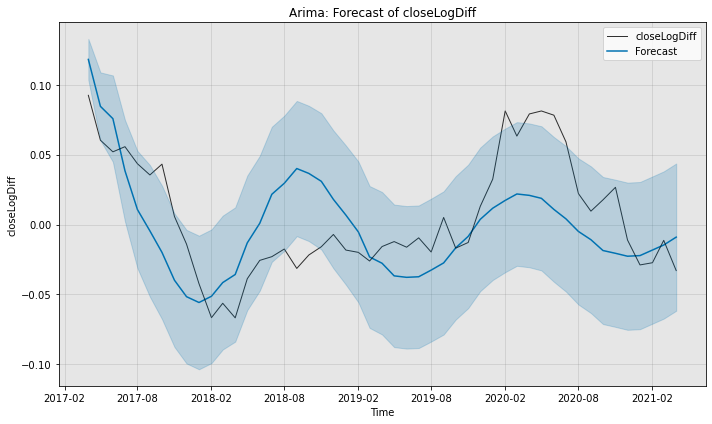

In [140]:
smape1 = ForecastMetric.sMAPE.value(ground_truth=closeLogDiff_test, predict=forecast1)
print(f"{type(model1).__name__} sMAPE is {smape1:.3f}")

# 可视化
fig, ax = model1.plot_forecast(time_series=closeLogDiff_test, plot_forecast_uncertainty=True)
plt.show()

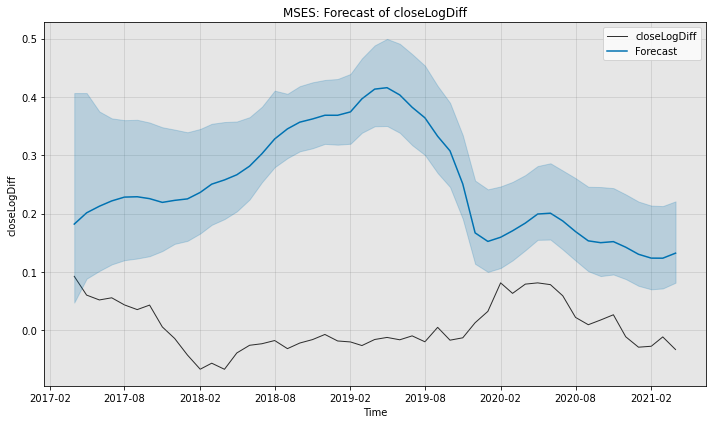

In [161]:
# 可视化
fig, ax = model2.plot_forecast(time_series=closeLogDiff_test, plot_forecast_uncertainty=True)
plt.show()

In [194]:
config1 = ArimaConfig(max_forecast_steps=100, target_seq_index=0,order=(25, 1, 6),transform=Identity())
model1  = Arima(config1)

In [195]:
model1.train(time_series_train)

(            closeLogDiff
 2001-01-01      0.000000
 2001-02-01     -0.098242
 2001-03-01      0.004293
 2001-04-01     -0.006660
 2001-05-01      0.025291
 ...                  ...
 2016-11-01     -0.015491
 2016-12-01      0.062633
 2017-01-01      0.056807
 2017-02-01      0.090760
 2017-03-01      0.105957
 
 [195 rows x 1 columns],
             closeLogDiff_err
 2001-01-01          0.021655
 2001-02-01          0.021655
 2001-03-01          0.021655
 2001-04-01          0.021655
 2001-05-01          0.021655
 ...                      ...
 2016-11-01          0.021655
 2016-12-01          0.021655
 2017-01-01          0.021655
 2017-02-01          0.021655
 2017-03-01          0.021655
 
 [195 rows x 1 columns])

In [196]:
forecast2, stderr2 = model1.forecast(time_stamps=time_stamps)

Arima sMAPE is 115.456


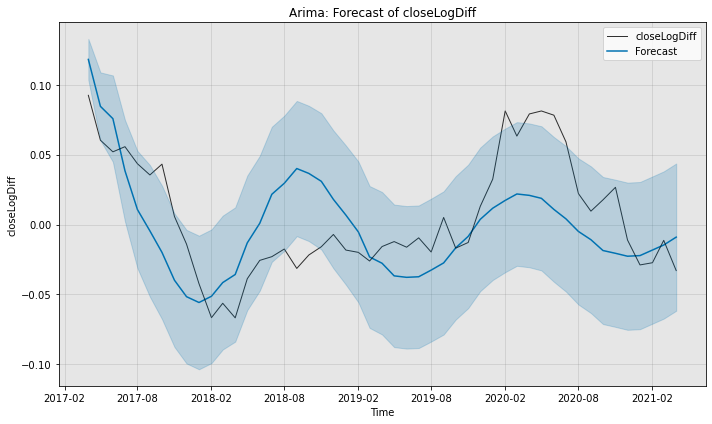

In [206]:
smape1 = ForecastMetric.sMAPE.value(ground_truth=closeLogDiff_test, predict=forecast2)
print(f"{type(model1).__name__} sMAPE is {smape1:.3f}")

# 可视化
fig, ax = model1.plot_forecast(time_series=time_series_test, plot_forecast_uncertainty=True)
plt.show()

In [141]:
for name, univariate in time_series.items():
    print(name)
    print(univariate)

closeLogDiff
2001-01-01   -0.085514
2001-02-01   -0.020605
2001-03-01    0.004219
2001-04-01    0.014296
2001-05-01    0.015411
                ...   
2020-12-01   -0.011115
2021-01-01   -0.028939
2021-02-01   -0.027353
2021-03-01   -0.011345
2021-04-01   -0.032991
Name: closeLogDiff, Length: 244, dtype: float64
diff(G1000037)_9_abs
2001-01-01     544.25
2001-02-01    1271.25
2001-03-01    1225.00
2001-04-01    1353.25
2001-05-01    2390.50
               ...   
2020-12-01    1626.00
2021-01-01    2348.15
2021-02-01    2880.40
2021-03-01    3985.50
2021-04-01    4360.60
Name: diff(G1000037)_9_abs, Length: 244, dtype: float64
diff(G0008003)_12_abs
2001-01-01    0.6
2001-02-01    0.5
2001-03-01    0.4
2001-04-01    0.5
2001-05-01    0.7
             ... 
2020-12-01    1.0
2021-01-01    1.0
2021-02-01    1.0
2021-03-01    1.0
2021-04-01    0.7
Name: diff(G0008003)_12_abs, Length: 244, dtype: float64
diff(G0000029)_12
2001-01-01    0.6
2001-02-01    0.5
2001-03-01    0.3
2001-04-01    0.3
